## Dataset
We loaded the dataset and describe its variables.

In [1]:
import pandas as pd

In [2]:
file_path = "../data/LungDisease.csv"
lung_disease = pd.read_csv(file_path)

In [3]:
lung_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   PEFR      122 non-null    int64
 1   Exposure  122 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [5]:
lung_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
PEFR,122.0,365.655738,105.132641,110.0,300.0,365.0,430.0,610.0
Exposure,122.0,14.081967,6.959850,0.0,7.0,17.0,20.0,23.0


### Data dictionary
| Column Name | Data Type | Description                              |
| :---------- | :-------- | :--------------------------------------- |
| PEFR        | float     | the volume of air forcefully expelled    |
|             |           | from the lungs in one quick exhalation,  |
|             |           | and is a reliable indicator of           |
|             |           | ventilation adequacy as well as airflow  |
|             |           | obstruction.                             |
| Exposure    | int       | exposure in years to air dust.           |

In [6]:
lung_disease.head(5)

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

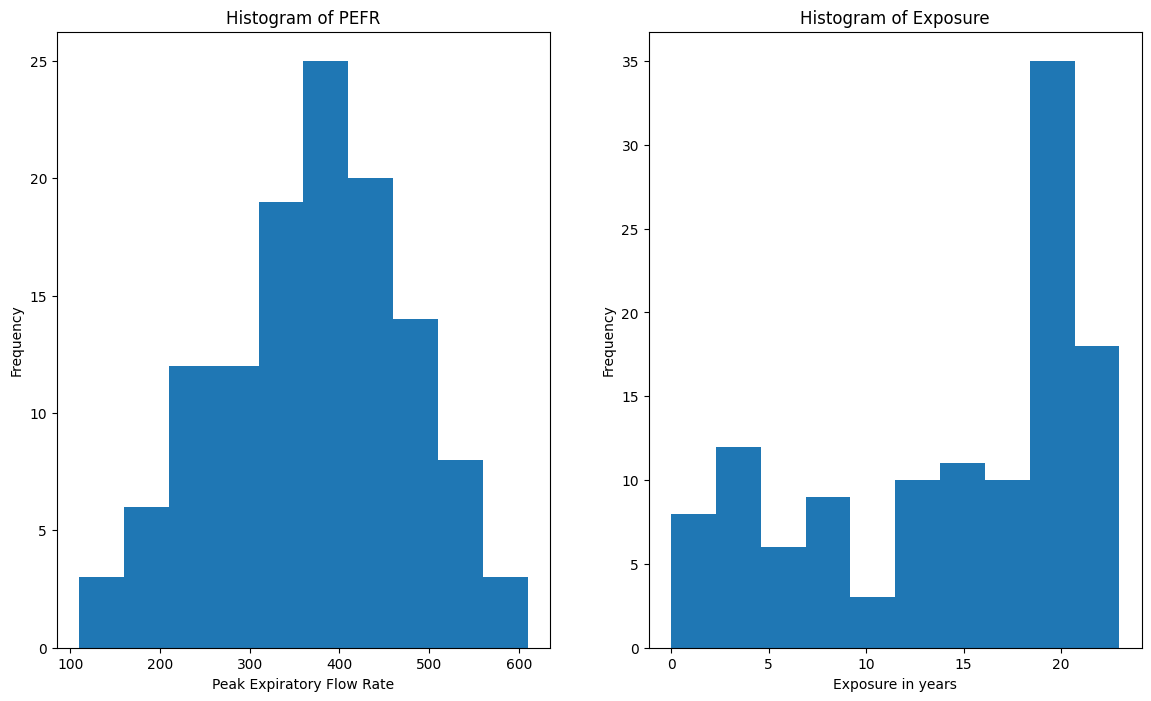

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 8))

ax[0].hist(lung_disease['PEFR'])
ax[0].set_xlabel('Peak Expiratory Flow Rate')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of PEFR')

ax[1].hist(lung_disease['Exposure'])
ax[1].set_xlabel('Exposure in years')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Exposure')

plt.show()

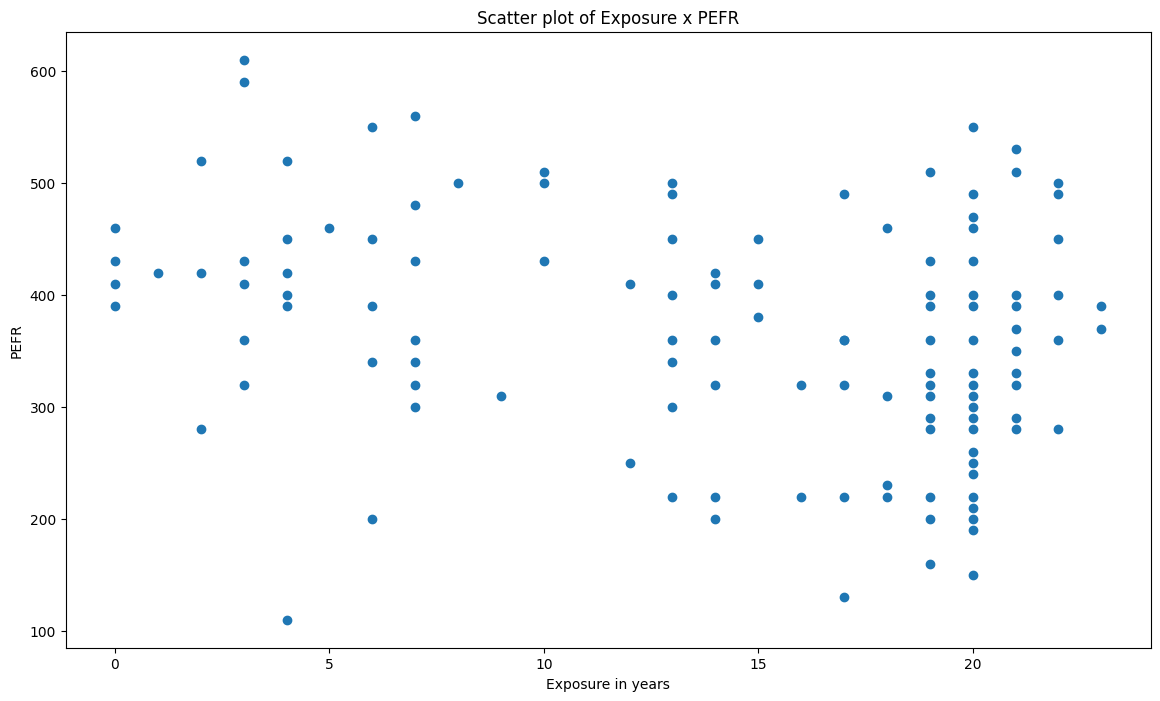

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.scatter(x=lung_disease['Exposure'],
           y=lung_disease['PEFR'])
ax.set_xlabel('Exposure in years')
ax.set_ylabel('PEFR')
ax.set_title('Scatter plot of Exposure x PEFR')

plt.show()

## Univariate Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = lung_disease.drop(columns=['PEFR'])
y = lung_disease['PEFR']

In [20]:
linear_model = LinearRegression()
linear_model.fit(X, y)

LinearRegression()

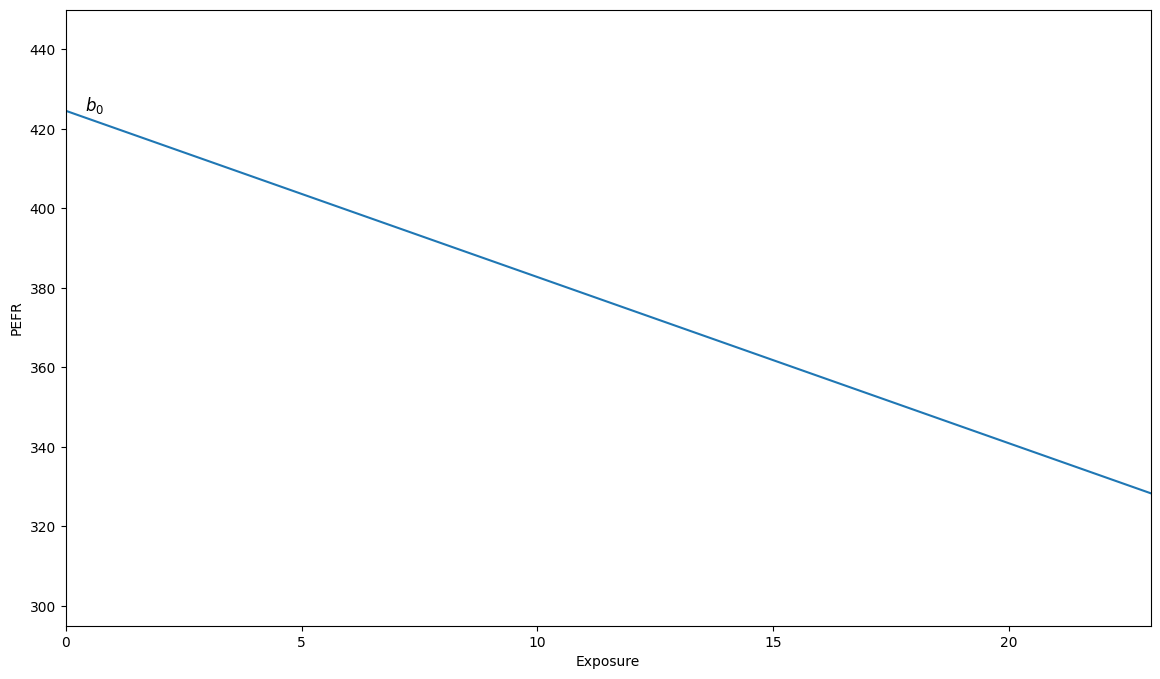

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.set_xlim(0, 23)
ax.set_ylim(295, 450)

ax.set_xlabel('Exposure')
ax.set_ylabel('PEFR')

## obtém os valores extremos da equação de regressão para desenhar os
## extremos da reta
ax.plot((0, 23),
        linear_model.predict(pd.DataFrame({'Exposure': [0, 23]})))

## posiciona o intercepto (coeficiente b_0) na reta
ax.text(0.4,
        linear_model.intercept_,
        r'$b_0$',
        size='larger')

plt.show()

In [22]:
print(f'Equation: Y = {linear_model.intercept_:.3f} + '
      f'{linear_model.coef_[0]:.3f} X')

Equation: Y = 424.583 + -4.185 X


In [31]:
predicted_value = linear_model.predict(X)
error = y - predicted_value

for x, real, p, erro in zip(lung_disease.Exposure,
                            lung_disease.PEFR,
                            predicted_value,
                            error):
    print(f"X: {x}  Real value: {real}  Predicted value: {p}  Error: {erro}")

X: 0  Real value: 390  Predicted value: 424.582806573957  Error: -34.58280657395699
X: 0  Real value: 410  Predicted value: 424.582806573957  Error: -14.582806573956987
X: 0  Real value: 430  Predicted value: 424.582806573957  Error: 5.4171934260430135
X: 0  Real value: 460  Predicted value: 424.582806573957  Error: 35.41719342604301
X: 1  Real value: 420  Predicted value: 420.39823008849555  Error: -0.3982300884955521
X: 2  Real value: 280  Predicted value: 416.2136536030341  Error: -136.21365360303412
X: 2  Real value: 420  Predicted value: 416.2136536030341  Error: 3.7863463969658824
X: 2  Real value: 520  Predicted value: 416.2136536030341  Error: 103.78634639696588
X: 3  Real value: 610  Predicted value: 412.0290771175727  Error: 197.97092288242732
X: 3  Real value: 590  Predicted value: 412.0290771175727  Error: 177.97092288242732
X: 3  Real value: 430  Predicted value: 412.0290771175727  Error: 17.970922882427317
X: 3  Real value: 410  Predicted value: 412.0290771175727  Error: 

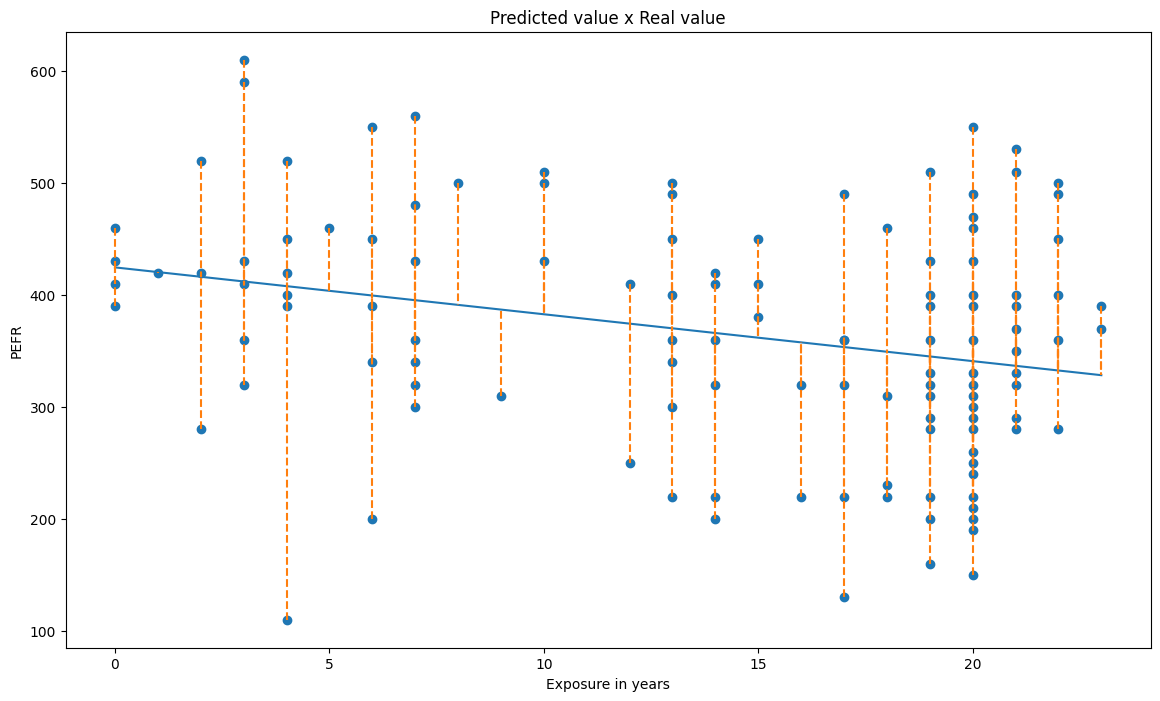

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.scatter(x=lung_disease['Exposure'],
           y=lung_disease['PEFR'])

ax.plot(lung_disease.Exposure, predicted_value)

for x, y_real, y_predicted in zip(lung_disease.Exposure,
                                  lung_disease.PEFR,
                                  predicted_value):
    ax.plot((x,x), (y_real, y_predicted), '--', color='C1')

ax.set_title('Predicted value x Real value')
ax.set_xlabel('Exposure in years')
ax.set_ylabel('PEFR')

plt.show()